In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)  #num_words=10000 means keep top 10,000 most frequently occurring words

In [3]:
train_data[4][:10]

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637]

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):  # no word index will exceed 10,000 because of our restriction
    results = np.zeros((len(sequences), dimension))   # creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

We will start the model with relatively few layers and parameters, and then increase the size of the layers or add new layers until it starts to overfit.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_of_original_model = model.fit(train_data, train_labels, epochs=20,
          batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6730 - loss: 0.6182 - val_accuracy: 0.8027 - val_loss: 0.4557
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8823 - loss: 0.3804 - val_accuracy: 0.8666 - val_loss: 0.3470
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9185 - loss: 0.2719 - val_accuracy: 0.8793 - val_loss: 0.3049
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9355 - loss: 0.2136 - val_accuracy: 0.8909 - val_loss: 0.2774
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9481 - loss: 0.1737 - val_accuracy: 0.8758 - val_loss: 0.3046
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9529 - loss: 0.1491 - val_accuracy: 0.8792 - val_loss: 0.3039
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9632 - loss: 0.1253 - val_accuracy: 0.8812 - val_loss: 0.3084
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9667 - loss: 0.1111 - val_accuracy: 0.8852 - v

Now lets replace it with a smaller model. then compare them on the loss curve

In [8]:
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_of_smaller_model = model.fit(train_data, train_labels, epochs=20,
          batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.7085 - loss: 0.5959 - val_accuracy: 0.8515 - val_loss: 0.4316
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8903 - loss: 0.3724 - val_accuracy: 0.8693 - val_loss: 0.3552
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9141 - loss: 0.2875 - val_accuracy: 0.8823 - val_loss: 0.3104
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9288 - loss: 0.2357 - val_accuracy: 0.8873 - val_loss: 0.2869
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9437 - loss: 0.1948 - val_accuracy: 0.8858 - val_loss: 0.2832
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9515 - loss: 0.1698 - val_accuracy: 0.8864 - val_loss: 0.2798
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9565 - loss: 0.1517 - val_accuracy: 0.8909 - val_loss: 0.2754
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9626 - loss: 0.1336 - val_accuracy: 0.8855 - v

In [9]:
import matplotlib.pyplot as plt

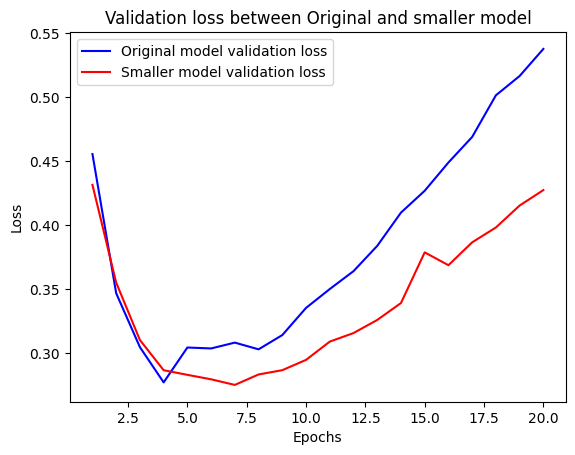

In [10]:
val_loss_original_model = history_of_original_model.history['val_loss']
val_loss_smaller_model = history_of_smaller_model.history['val_loss']
epoch = range(1, 21)
plt.plot(epoch, val_loss_original_model, 'b', label='Original model validation loss')
plt.plot(epoch, val_loss_smaller_model, 'r', label='Smaller model validation loss')
plt.title('Validation loss between Original and smaller model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

It can be seen that the smaller model starts overfitting later than the original model, at around the 7th epoch, while the original model starts at around 4. The perfomace also degrades slowly for the smaller model once it starts overfitting.
Now lets train a model with larger capacity than the original:

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_of_larger_model = model.fit(train_data, train_labels, epochs=20,
          batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 483ms/step - accuracy: 0.6294 - loss: 0.6519 - val_accuracy: 0.8616 - val_loss: 0.3451
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 451ms/step - accuracy: 0.8500 - loss: 0.3525 - val_accuracy: 0.8803 - val_loss: 0.2903
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 409ms/step - accuracy: 0.8984 - loss: 0.2545 - val_accuracy: 0.8844 - val_loss: 0.2787
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 500ms/step - accuracy: 0.9218 - loss: 0.1948 - val_accuracy: 0.8898 - val_loss: 0.2716
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 580ms/step - accuracy: 0.9479 - loss: 0.1423 - val_accuracy: 0.8869 - val_loss: 0.2957
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 449ms/step - accuracy: 0.9632 - loss: 0.1035 - val_accuracy: 0.8866 - val_loss: 0.2978
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.9824 - loss: 0.0589 - val_accuracy: 0.8851 - val_loss: 0.3354
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.9880 - loss: 0.0470 - val_accu

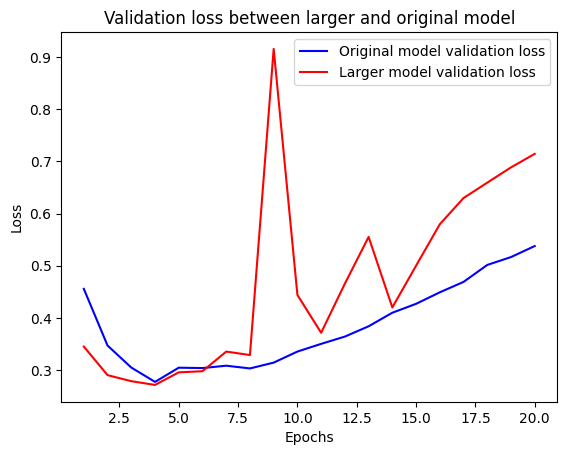

In [12]:
val_loss_original_model = history_of_original_model.history['val_loss']
val_loss_larger_model = history_of_larger_model.history['val_loss']
epoch = range(1, 21)
plt.plot(epoch, val_loss_original_model, 'b', label='Original model validation loss')
plt.plot(epoch, val_loss_larger_model, 'r', label='Larger model validation loss')
plt.title('Validation loss between larger and original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The larger model starts overfitting almost immediately and much more severly. The validation loss is also very unstable (noisy).
The more capacity the model has, the more quickly it can model the training data, but also it is more susceptible to overfitting.

Another regularization technique is the addition of weight regularization. let's explore it.

## Weight Regularization
This involves adding to the loss function of the model a cost associated with having large weights in order to put constraints on the complexity of the model by forcing its weight to take only small values. Remember that simpler models are less likely to overfit

In [13]:
from tensorflow.keras import regularizers

In [14]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_l2_reg = model.fit(train_data, train_labels,
                           epochs = 20, batch_size=512,
                           validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.6474 - loss: 0.7325 - val_accuracy: 0.8610 - val_loss: 0.5471
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8795 - loss: 0.4954 - val_accuracy: 0.8734 - val_loss: 0.4287
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9033 - loss: 0.3762 - val_accuracy: 0.8797 - val_loss: 0.3867
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9133 - loss: 0.3280 - val_accuracy: 0.8815 - val_loss: 0.3705
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9291 - loss: 0.2927 - val_accuracy: 0.8737 - val_loss: 0.3872
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9325 - loss: 0.2762 - val_accuracy: 0.8833 - val_loss: 0.3619
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9410 - loss: 0.2611 - val_accuracy: 0.8821 - val_loss: 0.3656
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9475 - loss: 0.2444 - val_accuracy: 0.8804 - 

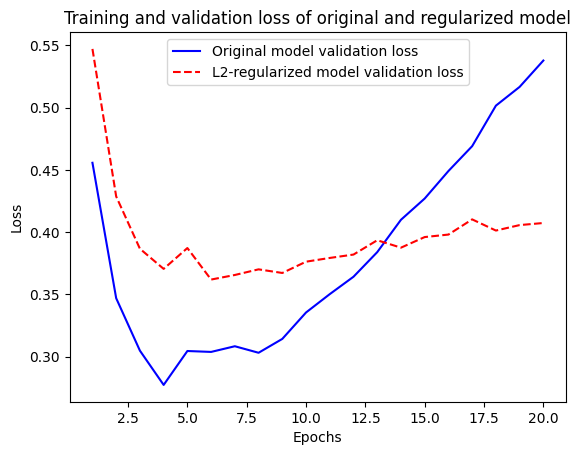

In [15]:
val_loss = history_l2_reg.history['val_loss']
val_loss_original_model = history_of_original_model.history['val_loss']
epoch = range(1, 21)
plt.plot(epoch, val_loss_original_model, 'b', label='Original model validation loss')
plt.plot(epoch, val_loss, 'r--', label='L2-regularized model validation loss')
plt.title('Training and validation loss of original and regularized model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Form the figure above, you can see the impact of the regularization penelty. The model with regularization is much more resistant to overfitting than the original model. Its starts overfitting late and continues slowly compares to the original model. That is even with the same number of  parameters.

This is the power of regularization